In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 12

In [ ]:
data=pd.read_csv('/content/classData.csv')
print(data)

              Ia          Ib          Ic        Va        Vb        Vc  Status
0    -151.291812   -9.677452   85.800162  0.400750 -0.132935 -0.267815       1
1    -336.186183  -76.283262   18.328897  0.312732 -0.123633 -0.189099       1
2    -502.891583 -174.648023  -80.924663  0.265728 -0.114301 -0.151428       1
3    -593.941905 -217.703359 -124.891924  0.235511 -0.104940 -0.130570       1
4    -643.663617 -224.159427 -132.282815  0.209537 -0.095554 -0.113983       1
...          ...         ...         ...       ...       ...       ...     ...
7856  -66.237921   38.457041   24.912239  0.094421 -0.552019  0.457598       0
7857  -65.849493   37.465454   25.515675  0.103778 -0.555186  0.451407       0
7858  -65.446698   36.472055   26.106554  0.113107 -0.558211  0.445104       0
7859  -65.029633   35.477088   26.684731  0.122404 -0.561094  0.438690       0
7860  -64.598401   34.480799   27.250065  0.131669 -0.563835  0.432166       0

[7861 rows x 7 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ia      7861 non-null   float64
 1   Ib      7861 non-null   float64
 2   Ic      7861 non-null   float64
 3   Va      7861 non-null   float64
 4   Vb      7861 non-null   float64
 5   Vc      7861 non-null   float64
 6   Status  7861 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 430.0 KB
None


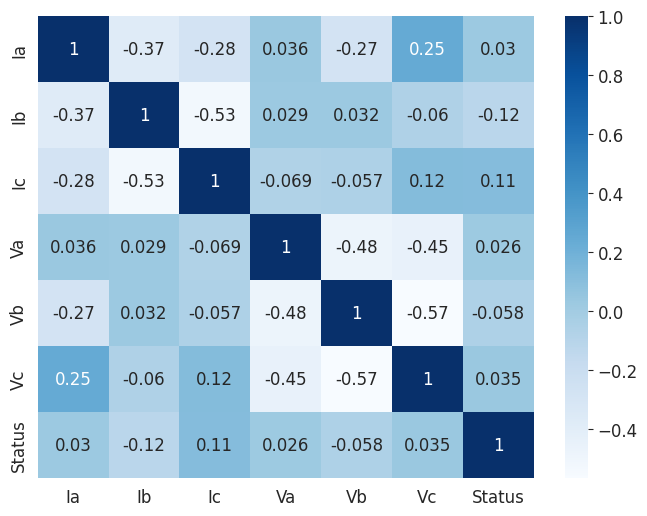

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

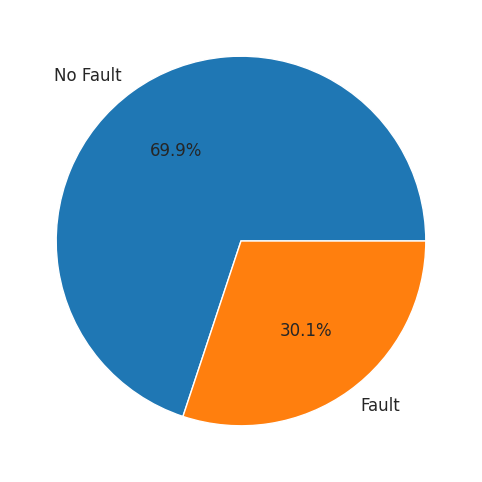

In [ ]:
plt.pie(x=data['Status'].value_counts(), labels=['No Fault', 'Fault'], autopct= '%1.1f%%', )
plt.show()

<Axes: xlabel='Ia', ylabel='Ic'>

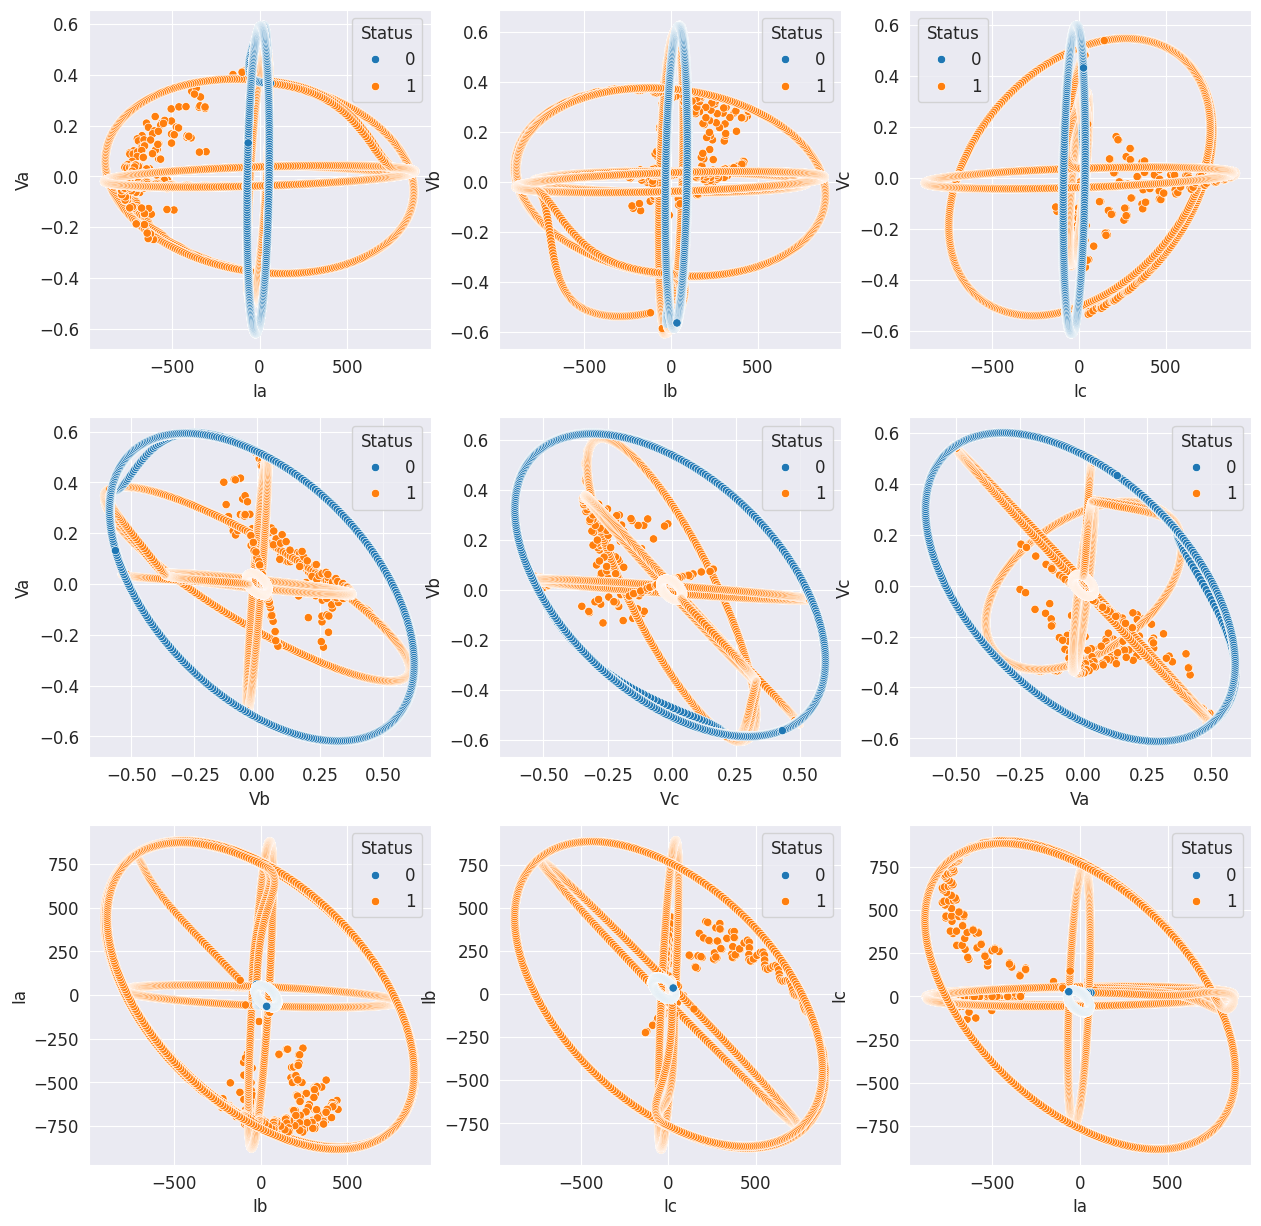

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3, 3, 1)
sns.scatterplot(data=data, x="Ia", y="Va", hue="Status")
plt.subplot(3, 3, 2)
sns.scatterplot(data=data, x="Ib", y="Vb", hue="Status")
plt.subplot(3, 3, 3)
sns.scatterplot(data=data, x="Ic", y="Vc", hue="Status")
plt.subplot(3, 3, 4)
sns.scatterplot(data=data, x="Vb", y="Va", hue="Status")
plt.subplot(3, 3, 5)
sns.scatterplot(data=data, x="Vc", y="Vb", hue="Status")
plt.subplot(3, 3, 6)
sns.scatterplot(data=data, x="Va", y="Vc", hue="Status")
plt.subplot(3, 3, 7)
sns.scatterplot(data=data, x="Ib", y="Ia", hue="Status")
plt.subplot(3, 3, 8)
sns.scatterplot(data=data, x="Ic", y="Ib", hue="Status")
plt.subplot(3, 3, 9)
sns.scatterplot(data=data, x="Ia", y="Ic", hue="Status")


In [ ]:
from sklearn.model_selection import train_test_split
X=data[["Ia","Ib","Ic","Va", "Vb", "Vc"]]
y=data["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6288, 6), (1573, 6), (6288,), (1573,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model = KNeighborsClassifier(n_neighbors=11)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


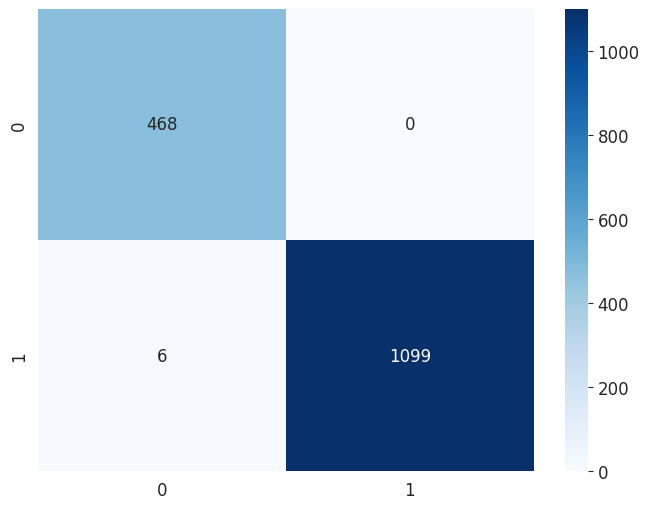

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 99.301%
Precision Score: 100.000%
Recall Score: 99.005%


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


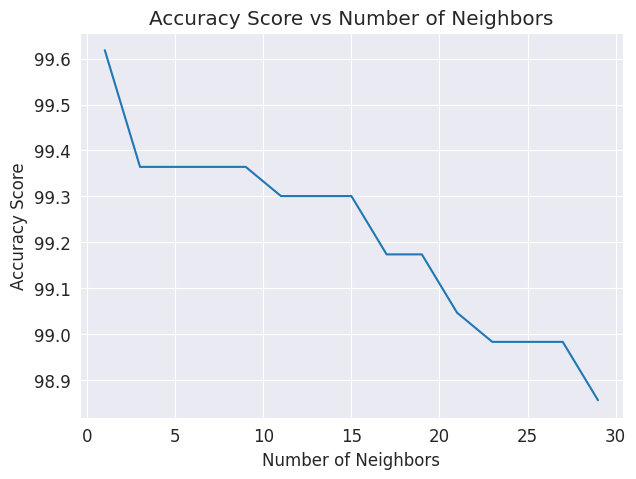

In [ ]:
N=range(1,30,2)
print(list(N))
accuracy_array=[]
for i in N:
  model = KNeighborsClassifier(n_neighbors=i)
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy_array.append(accuracy_score(y_test, y_pred)*100)
plt.figure(figsize=(7,5))
plt.plot(N, accuracy_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Number of Neighbors')
plt.show()